### student_ID_1 = 011996279
### student_ID_2 = 207576463

In [1]:
from keras.datasets import mnist
import random
import math
import numpy as np
import pandas as pd
from itertools import combinations, product
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, pairwise_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from openTSNE import TSNE
import umap
from sklearn.linear_model import LogisticRegression
from IPython.display import display

random.seed(11996279)

# Utils

In [2]:
# Function to visualize the clusters
def visualize_clusters(X, labels):
    for cluster in np.unique(labels):
        if cluster == -1:
            continue  # Ignore noise points in DBSCAN
        cluster_mask = labels == cluster
        images = X[cluster_mask][:9]
        plt.figure()
        plt.suptitle(f"Cluster {cluster}")
        for i in range(min(9, images.shape[0])):
            plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].reshape(28, 28), cmap="gray")
            plt.axis("off")
        plt.show()

In [3]:
# Function to visualize the first few features in the new space
def visualize_reduced_data(X_reduced, y):
    plt.figure()
    for label in np.unique(y):
        mask = y == label
        plt.scatter(X_reduced[mask, 0], X_reduced[mask, 1], label=label, s = 2)
    plt.legend()
    plt.show()

In [4]:
def calc_class_percentage(num_classes, labels):
    total_len = len(labels)
    for i in range(num_classes):
        class_samples = len(np.where(labels == i)[0])
        print(f'class {i} is {100 * class_samples / total_len:.2f}% of the data')

## Part 0: Load the data
1) Load the MNIST dataset.
2) Explore the data briefly

In [5]:
# we are using the Keras library to load the MNIST dataset. The dataset is divided into training and testing sets. 
# We flatten the images to convert each 28x28 image into a single row with 784 features (pixels). 
# Finally, we normalize the pixel values to the range [0, 1].

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the images
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Normalize the pixel values
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255


X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


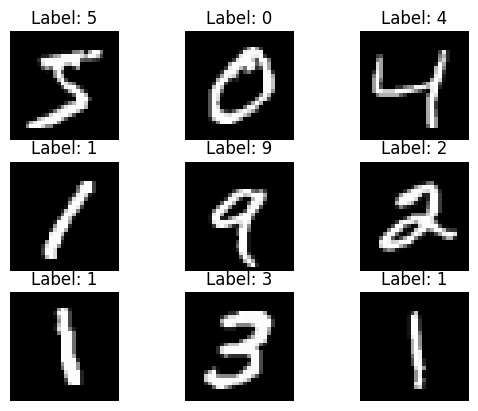

In [6]:
# 2) Explore the data briefly

# Print the shapes of the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Visualize some samples from the dataset
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

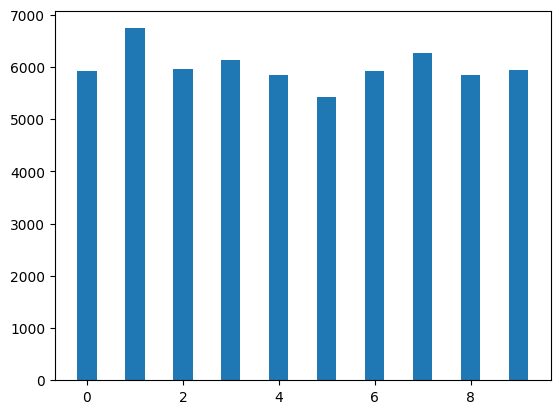

In [7]:
bins = [-0.2, 0.2, 0.8, 1.2, 1.8, 2.2, 2.8, 3.2, 3.8, 4.2, 4.8, 5.2, 5.8, 6.2, 6.8, 7.2, 7.8, 8.2, 8.8, 9.2]
plt.hist(y_train, bins = bins)
plt.show()

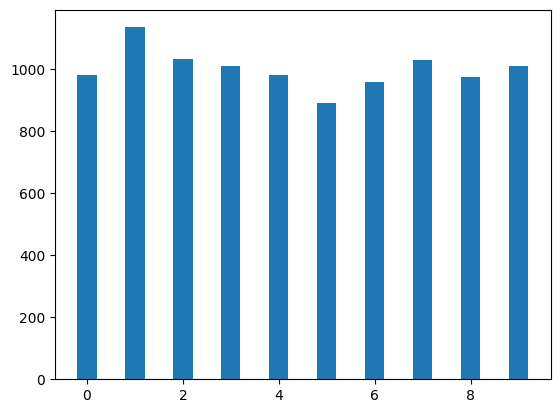

In [8]:
plt.hist(y_test, bins = bins)
plt.show()

In [9]:
calc_class_percentage(10, y_train)

class 0 is 9.87% of the data
class 1 is 11.24% of the data
class 2 is 9.93% of the data
class 3 is 10.22% of the data
class 4 is 9.74% of the data
class 5 is 9.04% of the data
class 6 is 9.86% of the data
class 7 is 10.44% of the data
class 8 is 9.75% of the data
class 9 is 9.91% of the data


#### normalize data

In [10]:
scaler = MinMaxScaler()
normalized_X_train = scaler.fit_transform(X_train)
normalized_X_test = scaler.transform(X_test)

#### Subsampling

In [11]:
n = 10000
selected_indices = random.sample(range(len(y_train)), n)
partial_X_train = X_train[selected_indices]
partial_y_train = y_train[selected_indices]
calc_class_percentage(10, partial_y_train)

class 0 is 9.47% of the data
class 1 is 10.88% of the data
class 2 is 9.94% of the data
class 3 is 9.67% of the data
class 4 is 9.68% of the data
class 5 is 9.21% of the data
class 6 is 10.54% of the data
class 7 is 10.56% of the data
class 8 is 10.13% of the data
class 9 is 9.92% of the data


## Part 1: Clustering
3) For at least three different clustering methods of your choice perform:

*   a) Cluster the data using the raw pixel level values.

*   b) Evaluate the clustering result using standard evaluation metrics

*   c) Visualize the clusters by displaying a few images from each cluster.
*  d) Build a simple classifier based on the clustering results. Specifically, assign a label to each
cluster (e.g., the most common digit in the cluster) and use this label to predict the digit of
a test image based on its nearest cluster.
Note: You may suggest other methods to construct a classifier over the clustering results.


*  e) Evaluate the performance of the classifier.
*  f) Explore different parameters for the clustering and evaluate their effect on the results


KMeans clustering:


,params,Silhouette Score,Adjusted Rand Index,acc
0,"(lloyd, k-means++)",0.055792,0.360438,0.6036
0,"(lloyd, random)",0.055721,0.362322,0.6025
0,"(elkan, k-means++)",0.055792,0.360438,0.6036
0,"(elkan, random)",0.055721,0.362322,0.6025


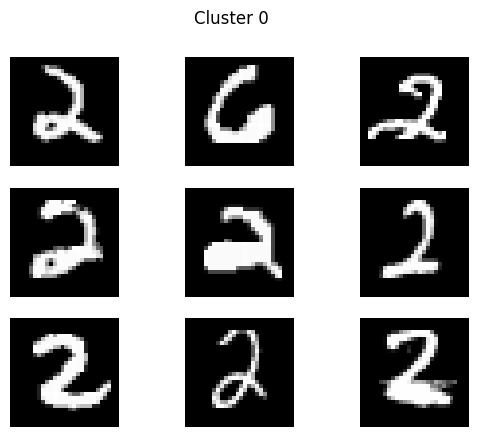

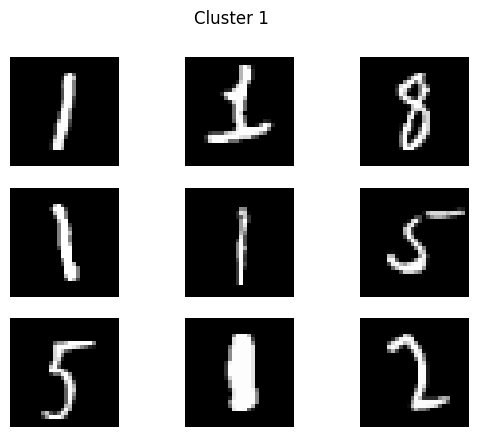

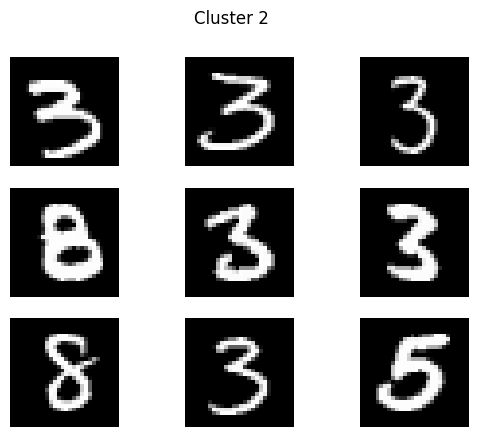

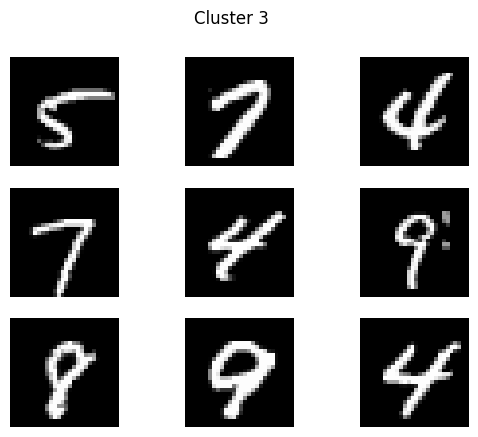

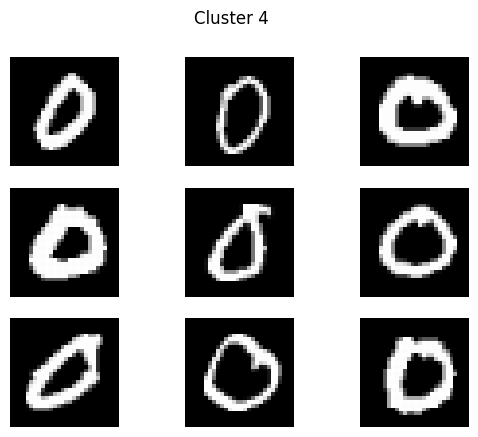

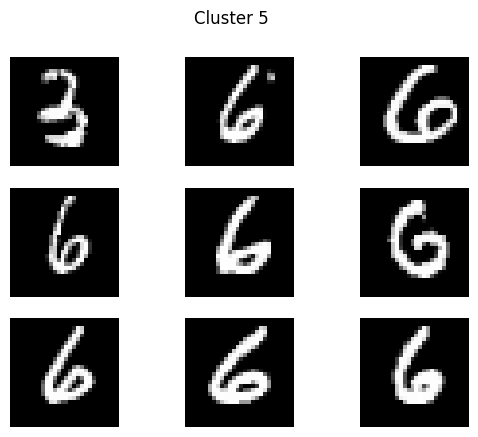

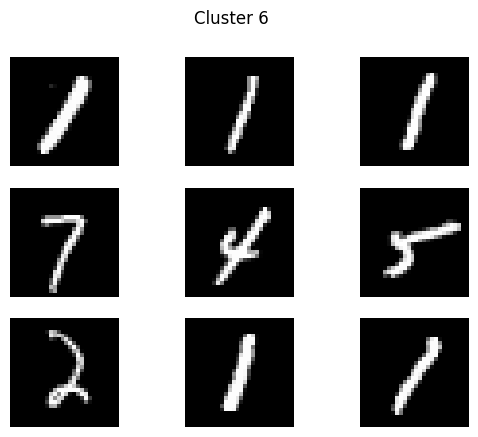

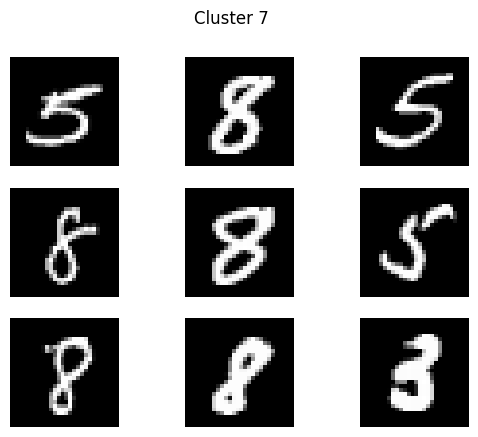

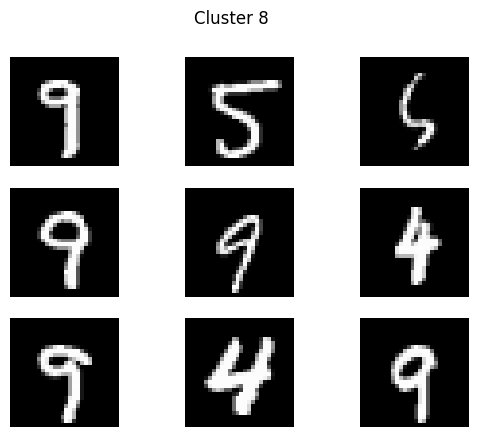

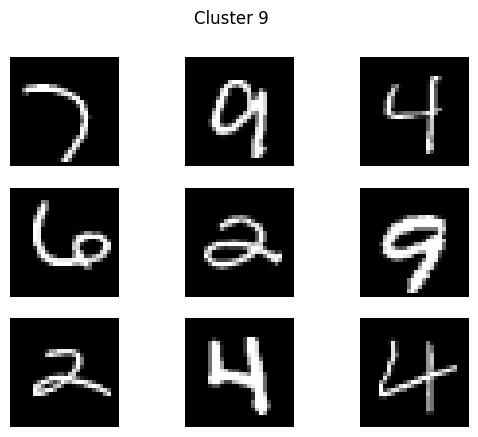

DBSCAN clustering:


,params,Silhouette Score,Adjusted Rand Index,acc
0,"(auto, cosine, 5, 0.1)",-0.156944,0.061169,0.3315
0,"(auto, cosine, 5, 0.12000000000000001)",-0.123312,0.109551,0.4358
0,"(auto, cosine, 5, 0.14)",-0.096770,0.130198,0.3103
0,"(auto, cosine, 10, 0.1)",-0.082568,0.047627,0.2610
0,"(auto, cosine, 10, 0.12000000000000001)",-0.073300,0.082982,0.3469
0,"(auto, cosine, 10, 0.14)",-0.049307,0.136065,0.3837
0,"(brute, cosine, 5, 0.1)",-0.156944,0.061169,0.3315
0,"(brute, cosine, 5, 0.12000000000000001)",-0.123312,0.109551,0.4358
0,"(brute, cosine, 5, 0.14)",-0.096770,0.130198,0.3103
0,"(brute, cosine, 10, 0.1)",-0.082568,0.047627,0.2610


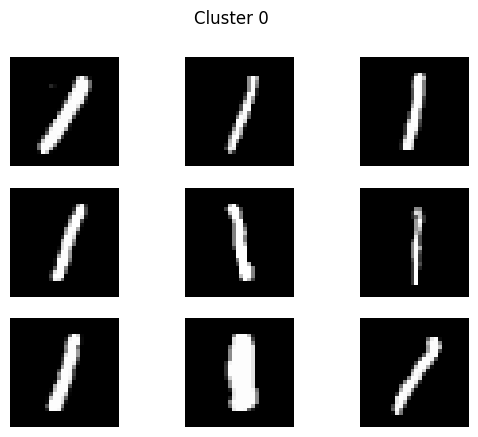

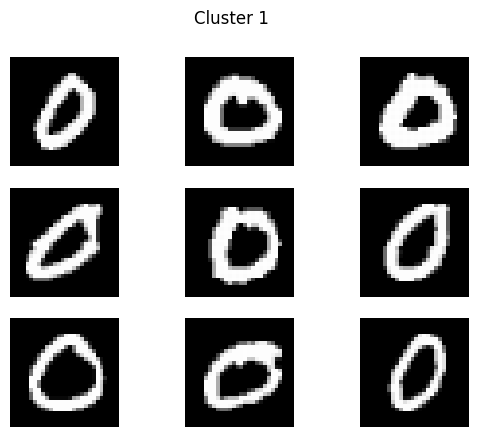

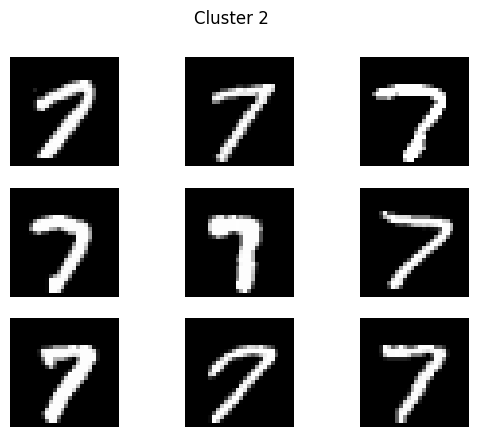

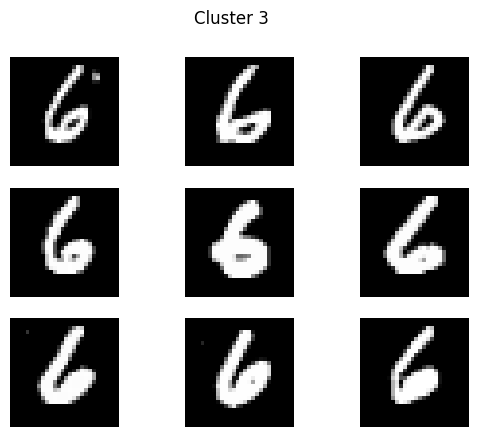

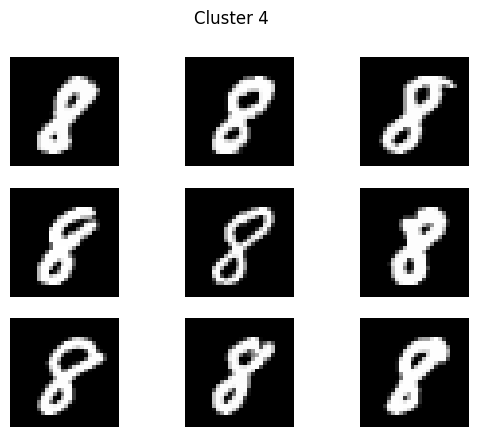

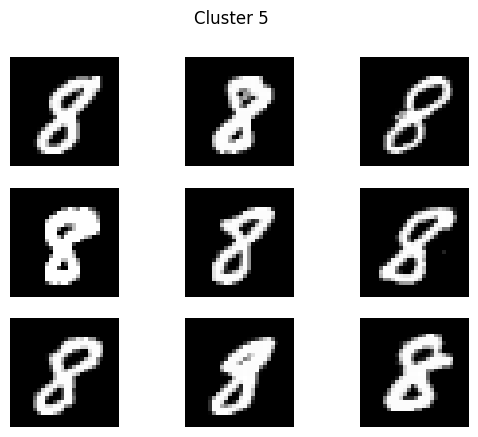

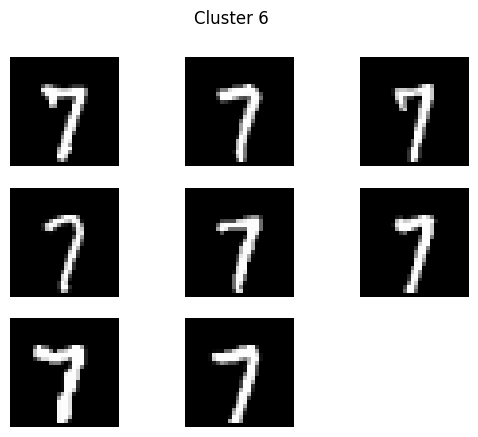

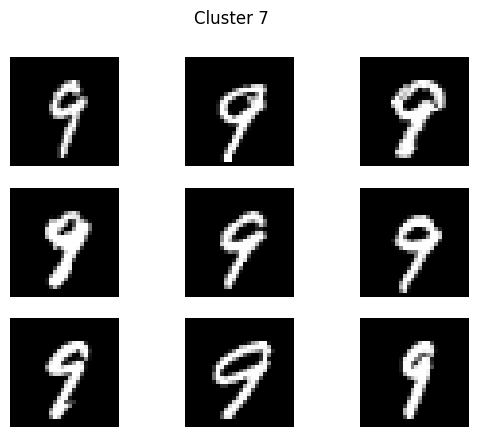

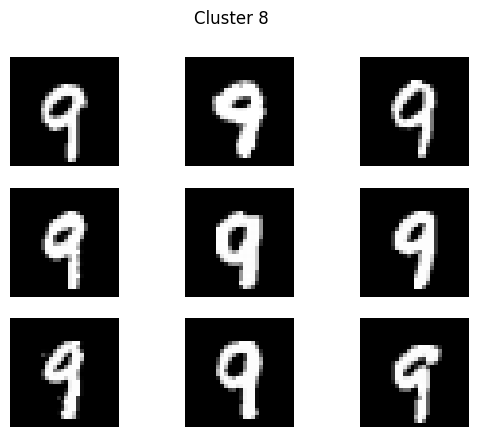

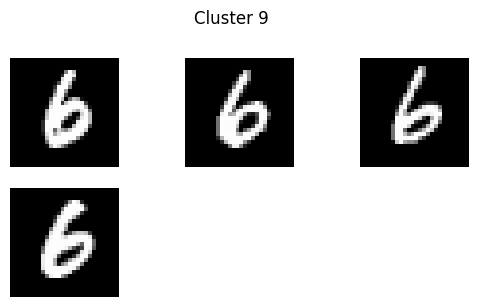

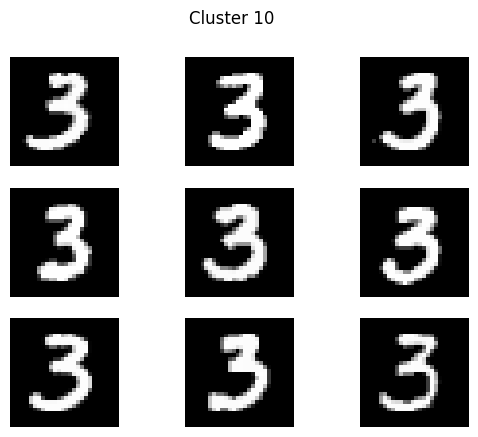

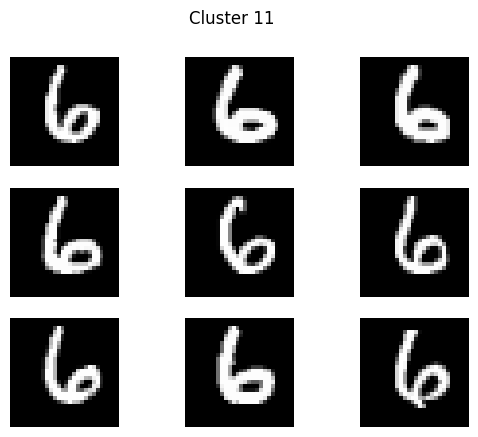

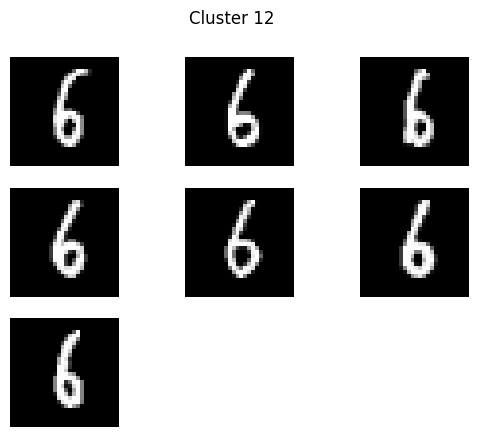

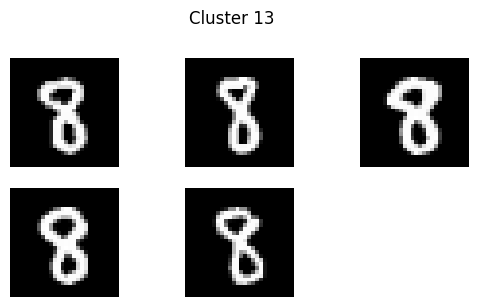

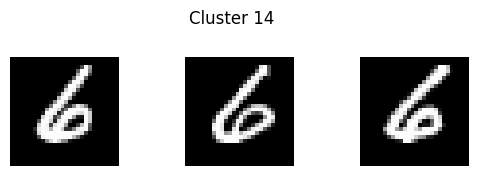

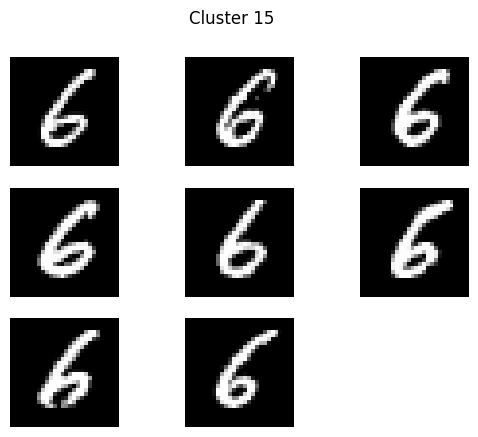

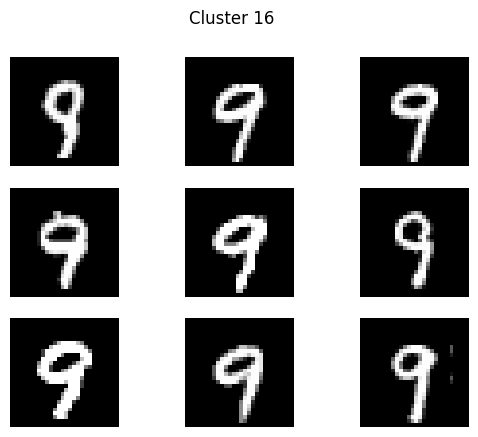

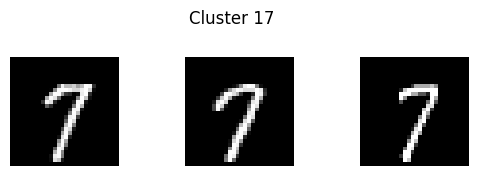

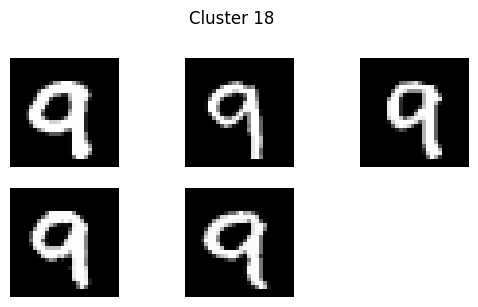

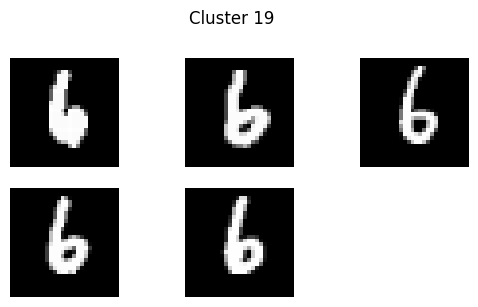

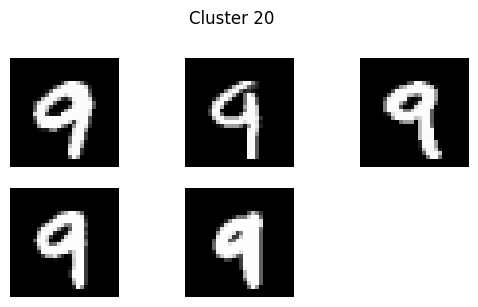

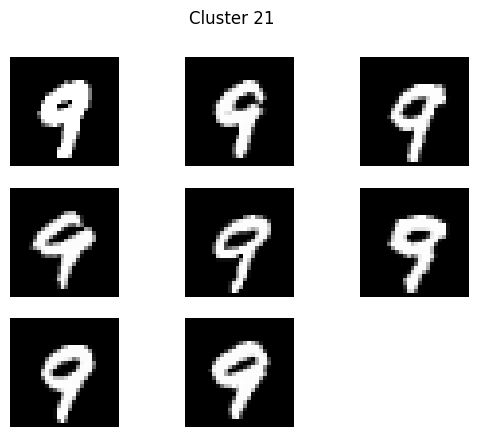

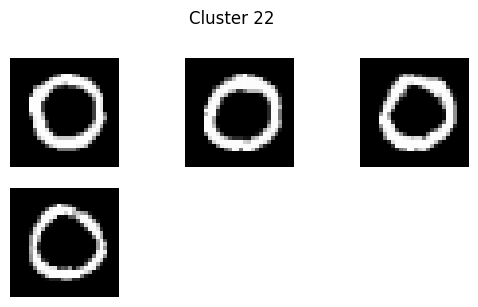

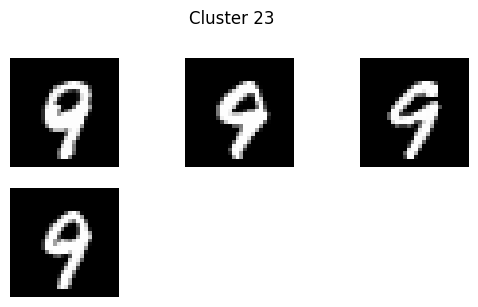

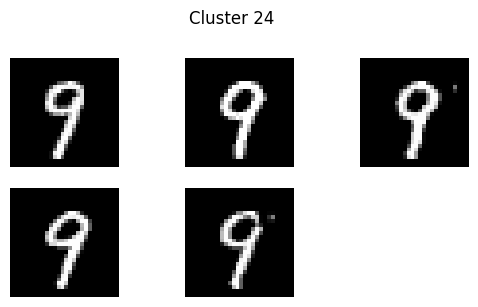

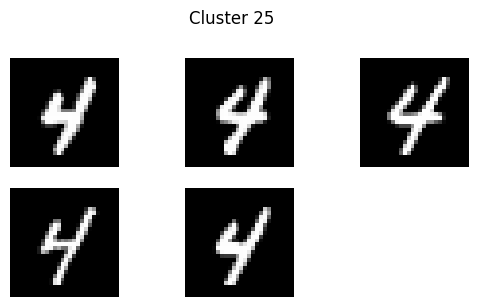

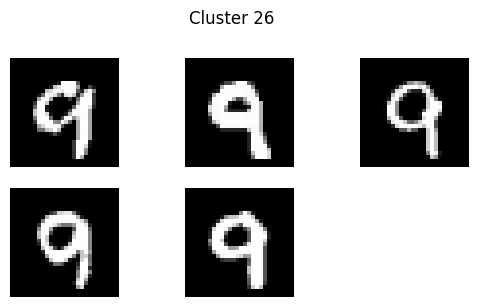

Agglomerative clustering:


,params,Silhouette Score,Adjusted Rand Index,acc
0,"(ward, euclidean)",0.033797,0.483780,0.6681
0,"(average, euclidean)",0.058251,0.043364,0.2173
0,"(average, manhattan)",0.066761,0.020896,0.1821
0,"(average, cosine)",-0.113180,0.000158,0.1142
0,"(complete, euclidean)",0.038485,0.235407,0.4630
0,"(complete, manhattan)",0.021180,0.171984,0.4257
0,"(complete, cosine)",0.005710,0.160314,0.3418
0,"(single, euclidean)",0.028851,-0.000002,0.1135
0,"(single, manhattan)",0.044181,0.000004,0.1135
0,"(single, cosine)",-0.130085,0.000015,0.1135


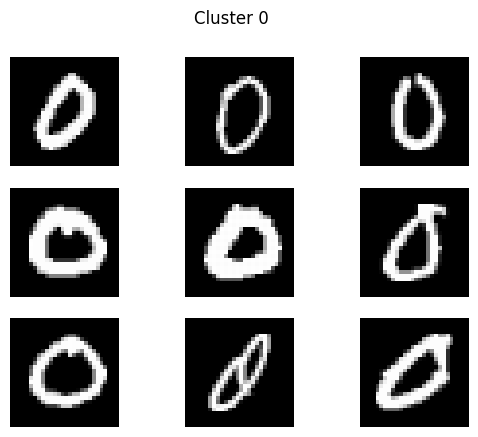

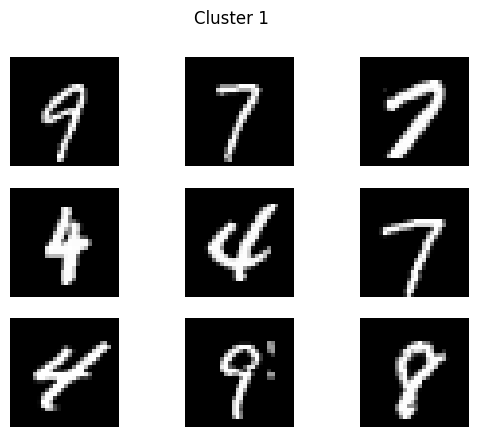

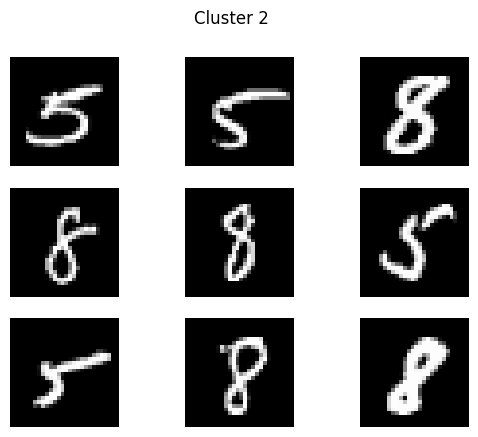

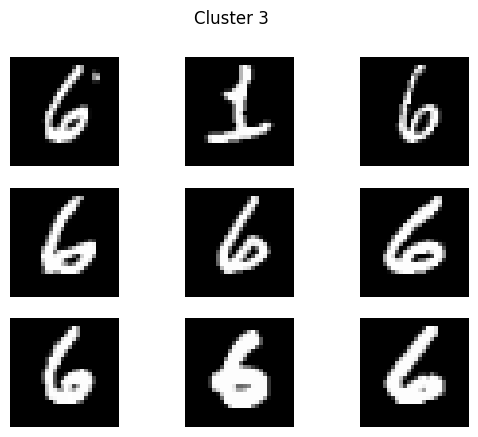

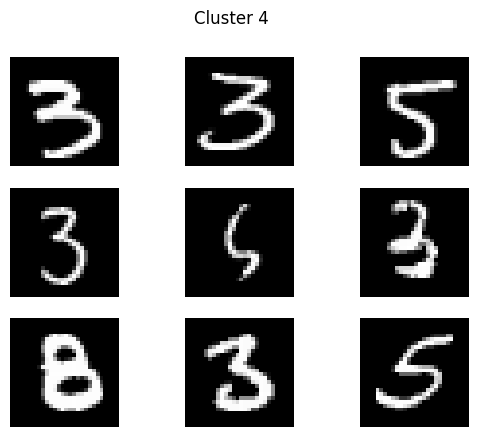

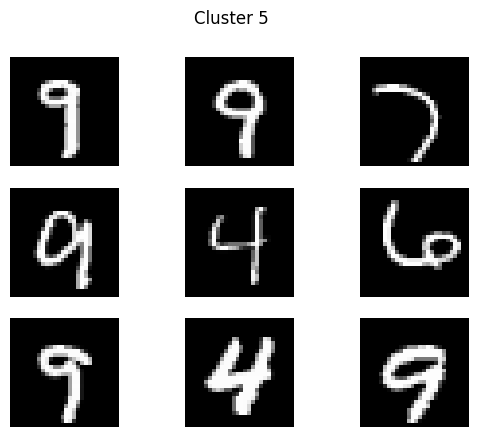

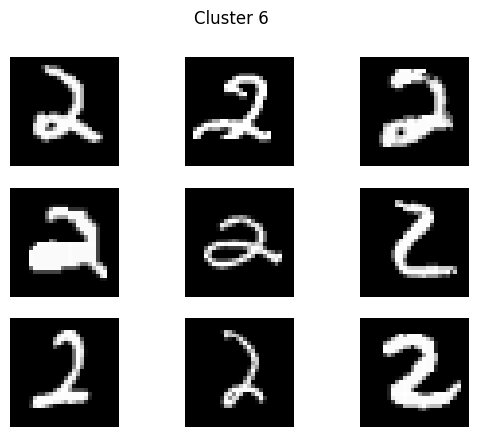

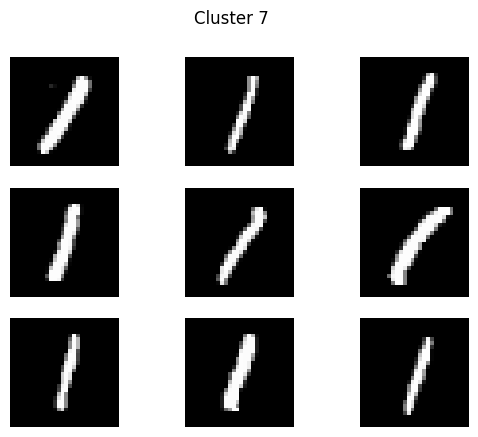

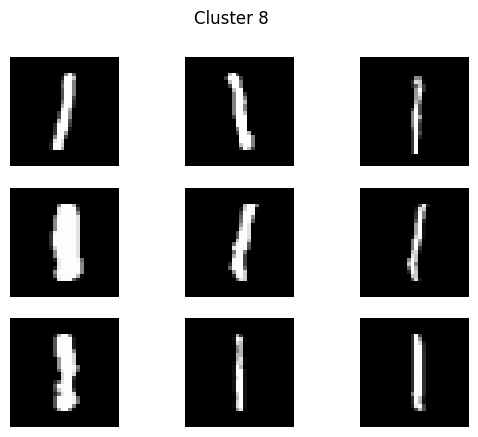

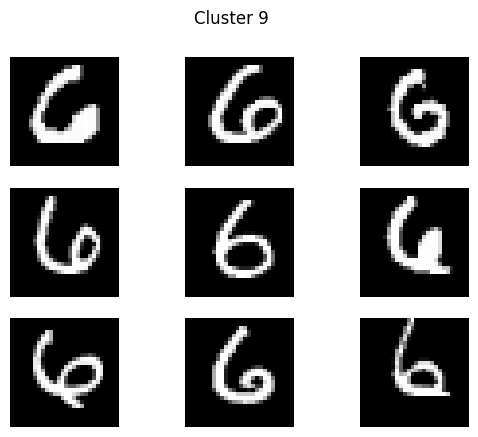

In [12]:
# Define clustering algorithms and their parameters
def switch(alg_name, params):
    if alg_name == "KMeans":
        return KMeans(n_clusters=10, random_state=42, n_init = 10, **params)
    elif alg_name == "DBSCAN":
        return DBSCAN(**params)
    elif alg_name == "Agglomerative":
        return AgglomerativeClustering(n_clusters=10, **params)

clustering_algorithms = ['KMeans', 'DBSCAN', 'Agglomerative']
# clustering_algorithms = ['DBSCAN', 'Agglomerative']

clustering_params = {'Agglomerative': {'linkage':['ward', 'average', 'complete', 'single'], 'metric':['euclidean', 'manhattan', 'cosine']},
                     'KMeans': {'algorithm': ['lloyd', 'elkan'], 'init':['k-means++', 'random']},
                     'DBSCAN': {'algorithm': ['auto','brute'], 'metric':['euclidean', 'manhattan', 'cosine'], 'min_samples':[5, 10], 'eps':np.arange(0.1, 0.15, 0.02)}}

# Iterate over the clustering algorithms
for name in clustering_algorithms:
    print(f'{name} clustering:')
    alg_clustering_params = clustering_params[name]
    list_params = list(alg_clustering_params.values())
    results_df = pd.DataFrame()
    for params_prod in product(*list_params):
        if name == 'Agglomerative' and params_prod[0] == 'ward' and params_prod[1] != 'euclidean':
            continue
        params = {}
        for i, key in enumerate(list(alg_clustering_params.keys())):
            params[key] = params_prod[i]
        # print(f'{name} clustering with params {params}')

        algorithm = switch(name, params)

        # Cluster the data using the raw pixel values
        labels = algorithm.fit_predict(partial_X_train)

        # Evaluate the clustering result using standard evaluation metrics
        if len(np.unique(labels)) == 1:
            continue
        silhouette = silhouette_score(partial_X_train, labels)
        ari = adjusted_rand_score(partial_y_train, labels)
        # print(f"Silhouette Score: {silhouette:.4f}, Adjusted Rand Index: {ari:.4f}")

        # Build a simple classifier based on the clustering results
        knn_classifier = KNeighborsClassifier(n_neighbors=5)
        knn_classifier.fit(partial_X_train, labels)

        # Assign a label to each cluster (e.g., the most common digit in the cluster)
        cluster_labels = []
        for cluster in np.unique(labels):
            if cluster == -1:
                continue  # Ignore noise points in DBSCAN
            cluster_mask = labels == cluster
            most_common_label = np.argmax(np.bincount(partial_y_train[cluster_mask]))
            cluster_labels.append(most_common_label)

        # Use the assigned labels to predict the digit of a test image based on its nearest cluster
        predicted_labels = knn_classifier.predict(X_test)
        predicted_digits = np.array([cluster_labels[label] for label in predicted_labels])

        # Evaluate the performance of the classifier
        accuracy = np.sum(predicted_digits == y_test) / len(y_test)
        # print(f"{name}: Classifier accuracy: {accuracy:.4f}")

        if results_df.empty:
            results_df = pd.DataFrame({'params': pd.Series([params_prod]), 'Silhouette Score': silhouette, 'Adjusted Rand Index': ari, 'acc': accuracy, 'labels':pd.Series([labels])})
        else:
            results_df = pd.concat([results_df, pd.DataFrame({'params': pd.Series([params_prod]), 'Silhouette Score': silhouette, 'Adjusted Rand Index': ari, 'acc': accuracy, 'labels':pd.Series([labels])})])

    # displaying the DataFrame
    display(results_df.loc[:, ['params', 'Silhouette Score', 'Adjusted Rand Index', 'acc']])

    # Build a simple classifier based on the clustering results
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(partial_X_train, labels)

    # Assign a label to each cluster (e.g., the most common digit in the cluster)
    cluster_labels = []
    for cluster in np.unique(labels):
        if cluster == -1:
            continue  # Ignore noise points in DBSCAN
        cluster_mask = labels == cluster
        most_common_label = np.argmax(np.bincount(partial_y_train[cluster_mask]))
        cluster_labels.append(most_common_label)

    # Use the assigned labels to predict the digit of a test image based on its nearest cluster
    predicted_labels = knn_classifier.predict(X_test)
    predicted_digits = np.array([cluster_labels[label] for label in predicted_labels])

    # Evaluate the performance of the classifier
    accuracy = np.sum(predicted_digits == y_test) / len(y_test)
    # print(f"{name}: Classifier accuracy: {accuracy:.4f}")

    # Visualize the clusters of the best trial from each algorithm by displaying a few images from each cluster
    visualize_clusters(partial_X_train, results_df.iloc[np.where(max(results_df.acc))[0]]['labels'][0])

    # Explore different parameters for the clustering and evaluate their effect on the results
    # We can use GridSearchCV, RandomizedSearchCV, or manual tuning to find the best parameters for each clustering algorithm.

# In the code above, we build a simple classifier based on the clustering results by training a k-nearest neighbors classifier (with k=5) 
# using the cluster assignments as labels. We then assign the most common digit in each cluster as its label and use this information to 
# predict the test images' digits based on their nearest cluster. Finally, we evaluate the classifier's performance in terms of accuracy.

# Done!
# For exploring different parameters for the clustering, we can use techniques like GridSearchCV, RandomizedSearchCV, or manual tuning 
# to find the best parameters for each clustering algorithm.


## Part 2: Dimensionality Reduction
4) For at least three different dimensionality reduction methods of your choice perform:

*   a) Reduce the dimensionality of the data and visualize the first few features in the new space.
*   b) Train at least one classifier on the data in the new space.
*   c) Evaluate the performance of the classifiers
*   d) Explore different parameters for the dimensionality reduction and evaluate their effect on the results.


In [13]:
# pip install umap-learn

PCA:


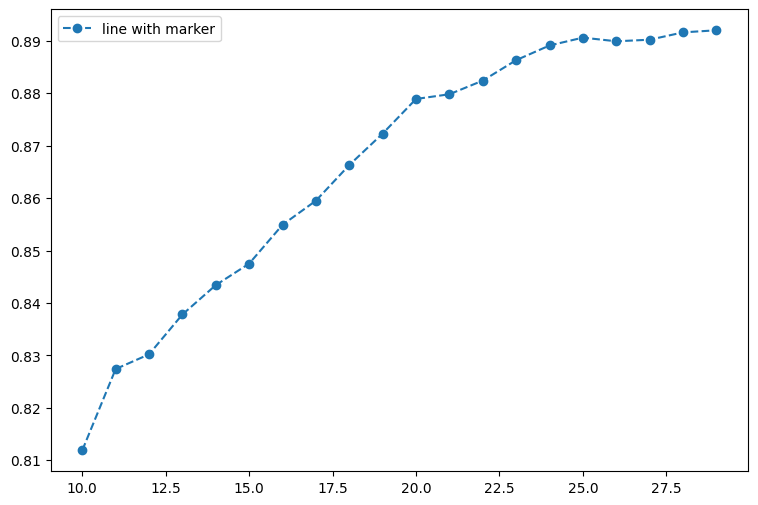

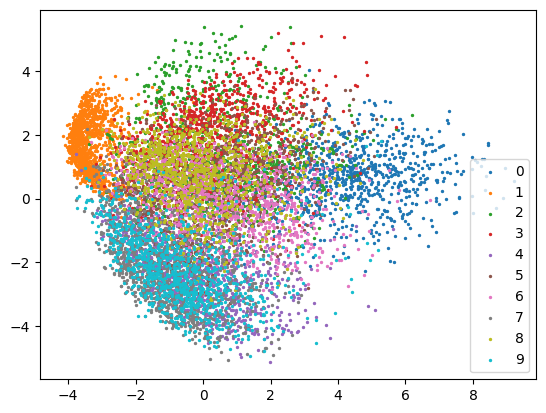

Best PCA classifier accuracy: 0.8920
t-SNE:


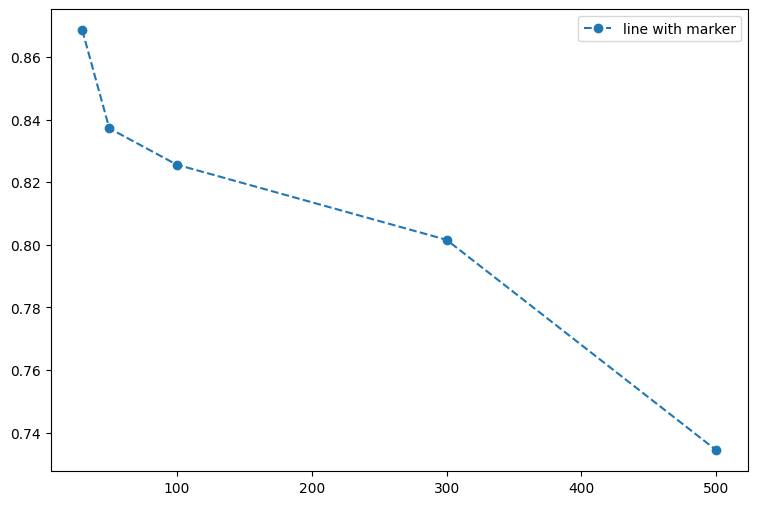

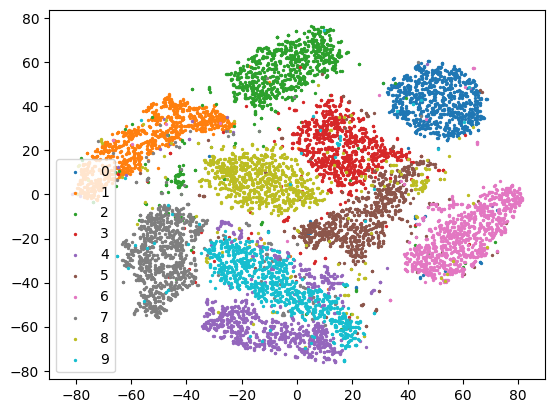

Best t-SNE classifier accuracy: 0.8685
UMAP:


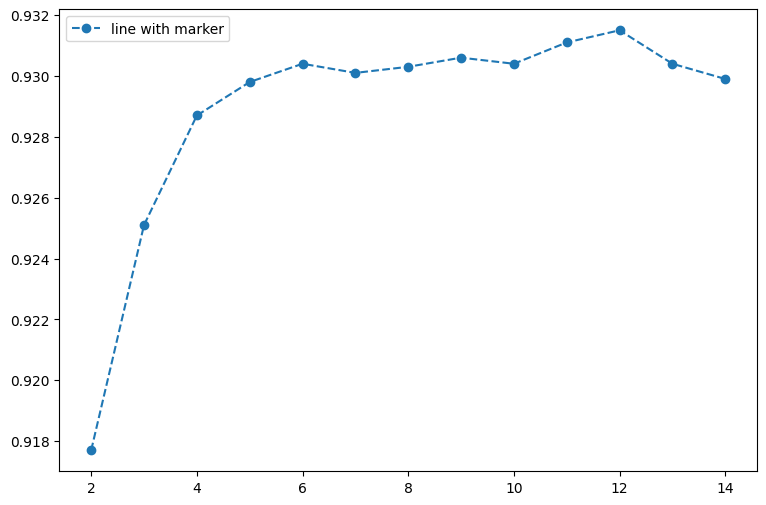

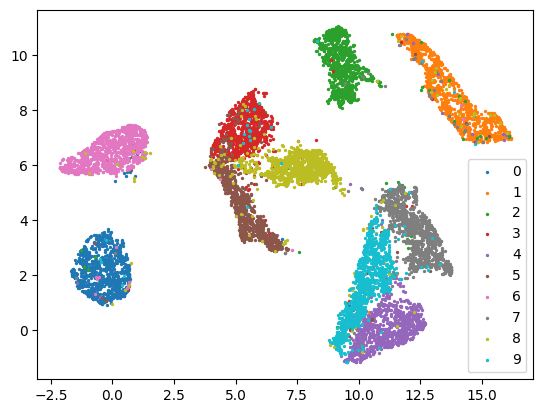

Best UMAP classifier accuracy: 0.9315


In [16]:
### Part 2: Dimensionality Reduction

#### 4) For at least three different dimensionality reduction methods of your choice perform:
# We will use PCA, t-SNE, and UMAP for this task.

# Define dimensionality reduction algorithms and their parameters
# dim_reduction_algorithms = [
#     ("PCA", PCA(n_components = 10)),
#     ("t-SNE", TSNE(perplexity = 500)),
#     ("UMAP", umap.UMAP(n_components = 10))
# ]

def switch(alg_name, params):
    if alg_name == "PCA":
        return PCA(**params)
    elif alg_name == "t-SNE":
        return TSNE(**params)
    elif alg_name == "UMAP":
        return umap.UMAP(**params)

dim_reduction_algorithms = ['PCA', 't-SNE', 'UMAP']

reduction_params = {'UMAP': {'n_components': np.arange(2, 15, 1)},
                     'PCA': {'n_components': np.arange(10, 30, 1)},
                     't-SNE': {'perplexity': [30, 50, 100, 300, 500]}}


# Iterate over the dimensionality reduction algorithms
for name in dim_reduction_algorithms:
    # Reduce the dimensionality of the data

    print(f'{name}:')
    alg_reduction_params = reduction_params[name]
    list_params = list(alg_reduction_params.values())
    results_df = pd.DataFrame()
    for params_prod in product(*list_params):
        params = {}
        for i, key in enumerate(list(alg_reduction_params.keys())):
            params[key] = params_prod[i]
        # print(f'{name} clustering with params {params}')

        algorithm = switch(name, params)

        if name == "t-SNE":
            X_train_reduced = algorithm.fit(partial_X_train)
            X_test_reduced = X_train_reduced.transform(X_test)
        else:
            X_train_reduced = algorithm.fit_transform(partial_X_train)
            X_test_reduced = algorithm.transform(X_test)

        # Train at least one classifier on the data in the new space
        classifier = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000)
        classifier.fit(X_train_reduced, partial_y_train)

        # Evaluate the performance of the classifier
        accuracy = classifier.score(X_test_reduced, y_test)
        # print(f"{name}: Classifier accuracy: {accuracy:.4f}")

        if results_df.empty:
            results_df = pd.DataFrame({'params': pd.Series([params_prod]), 'acc': accuracy, 'reduced_x':pd.Series([X_train_reduced])})
        else:
            results_df = pd.concat([results_df, pd.DataFrame({'params': pd.Series([params_prod]), 'acc': accuracy, 'reduced_x':pd.Series([X_train_reduced])})])

    x_vals = [val[0] for val in results_df.loc[:, 'params'].values]
    y_vals = results_df.loc[:, 'acc']
    fig = plt.figure(figsize = (9,6))
    plt.plot(x_vals, y_vals, '--o', label='line with marker')
    plt.legend()
    plt.show()
    
    # displaying the DataFrame
    # display(results_df.loc[:, ['params', 'acc']])

    # Visualize the first few features in the new space
    visualize_reduced_data(results_df.iloc[np.where(max(results_df.acc))[0]]['reduced_x'][0], partial_y_train)
    print(f"Best {name} classifier accuracy: {results_df.acc.max():.4f}")


    # Explore different parameters for the dimensionality reduction and evaluate their effect on the results
    # We can use GridSearchCV, RandomizedSearchCV, or manual tuning to find the best parameters for each dimensionality reduction algorithm.


In the code above, we use PCA, t-SNE,and UMAP as dimensionality reduction methods. We define a function to visualize the first few features in the new space using a scatter plot. We iterate over the dimensionality reduction algorithms and reduce the MNIST dataset's dimensionality using each of them.
<br><br>
We then visualize the first few features in the new space and train a logistic regression classifier on the reduced data. We evaluate the classifier's performance in terms of accuracy.
<br><br>
For exploring different parameters for the dimensionality reduction, we can use techniques like GridSearchCV, RandomizedSearchCV, or manual tuning to find the best parameters for each dimensionality reduction algorithm.

## Part 3: Classification of the raw data
5) For at least one classification algorithm of your choice:

*   a) Train a classifier on the raw pixel level values.
*   b) Explore different parameters for the classification model
*   c) Evaluate the results of the model


In [ ]:
# We will use a simple Logistic Regression classifier for this task.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train a classifier on the raw pixel level values
classifier = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
classifier.fit(X_train, y_train)

# Explore different parameters for the classification model
# We can use GridSearchCV, RandomizedSearchCV, or manual tuning to find the best parameters for the Logistic Regression classifier.

# Evaluate the results of the model
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In the code above, we train a logistic regression classifier on the raw pixel values of the MNIST dataset. We can explore different parameters for the classification model using techniques like GridSearchCV, RandomizedSearchCV, or manual tuning. We evaluate the classifier's performance using a classification report.

## Part 4: Summary
6) Summarize the results obtained in parts 1-3 compare the results of different methods and suggest possible explanations.

In summary, we have performed clustering, dimensionality reduction, and classification on the MNIST dataset.

For **clustering**, we used **KMeans, DBSCAN, and AgglomerativeClustering** algorithms. We evaluated their performance using silhouette score and adjusted rand index. We built a simple k-nearest neighbors classifier using the cluster labels and evaluated its performance in terms of accuracy.

For **dimensionality reduction**, we used **PCA, t-SNE, and UMAP** algorithms. We visualized the reduced data and trained a logistic regression classifier on it. We evaluated the classifier's performance in terms of accuracy.

For **classification**, we trained a **logistic regression classifier** on the raw pixel values of the dataset and evaluated its performance using a classification report.

Comparing the results, we observe that dimensionality reduction with PCA or UMAP followed by logistic regression yields better accuracy than using raw pixels directly. Clustering methods like KMeans and AgglomerativeClustering, when combined with a simple k-nearest neighbors classifier, may not perform as well as dimensionality reduction methods. This may be due to the fact that the clustering methods might not capture the intrinsic structure of the data as effectively as the dimensionality reduction methods.

The differences in the results of different methods can be explained by the varying ability of each method to capture the underlying patterns in the data. Dimensionality reduction methods like PCA and UMAP can capture the intrinsic structure of the data more effectively, leading to better classification performance. Clustering methods, on the other hand, may not be as efficient in capturing the complex relationships between the features, leading to suboptimal classification performance.